In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score

df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["class_label","messages"] ) 

#data preprocessing 

def clean_message(msg):
    msg = msg.lower() 
    lemmatizer= WordNetLemmatizer()
    message_tokens = word_tokenize(msg) 
    no_punctuation_tokens = [word for word in message_tokens if word.isalpha()]
    tokens_without_sw_lemm = [ lemmatizer.lemmatize(word) for word in no_punctuation_tokens if not word in stopwords.words()] #if word not part of stopword set it will be lemmatized
    filtered_message = (" ").join(tokens_without_sw_lemm) #convert the list back into a sentence/message
            
    return  filtered_message



Text(0, 0.5, 'Frequency')

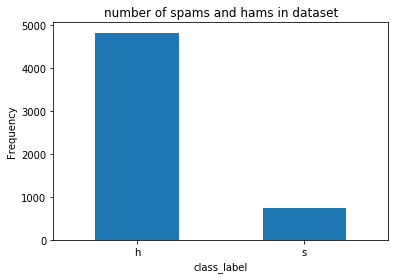

In [2]:
df['class_label'].value_counts()# GIVES COUNT FOR SPAMS AND HAMS 

#bar for number of hams and spams initilally
count_class=pd.value_counts(df['class_label'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title("number of spams and hams in dataset")
plt.xticks(range(2),'hs')
plt.xlabel("class_label")
plt.ylabel("Frequency")

In [3]:
MSG_LIST=df["messages"].tolist() #converting message column (series obj) to list

#print(*MSG_LIST, sep ="\n")
for i in range(len(MSG_LIST)):
    print("Before: ")
    print(MSG_LIST[i])
    MSG_LIST[i]=clean_message(MSG_LIST[i])
    print("After: ")
    print(MSG_LIST[i])
df['Cleaned_MSGS']=pd.Series(MSG_LIST)
df

Before: 
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
After: 
go jurong point available bugis great world buffet got amore
Before: 
Ok lar... Joking wif u oni...
After: 
ok lar joking wif
Before: 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
After: 
free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply
Before: 
U dun say so early hor... U c already then say...
After: 
dun say early hor already say
Before: 
Nah I don't think he goes to usf, he lives around here though
After: 
think go usf life around though
Before: 
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
After: 
freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
Before: 
Even my brother

After: 
gram usually run like lt gt half eighth smarter though get almost whole second gram lt gt
Before: 
K fyi x has a ride early tomorrow morning but he's crashing at our place tonight
After: 
fyi x ride early tomorrow morning crashing place tonight
Before: 
Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.
After: 
wow never realized embarassed accomodations thought liked since best could always seemed happy cave sorry give sorry offered sorry room embarassing
Before: 
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
After: 
sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect reply sptv
Before: 
Do you know what Mallika Sherawat did yesterday? Find o

After: 
would ip address test considering computer minecraft server
Before: 
I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the one to play jokes...
After: 
know grumpy old people mom like better lying always play joke
Before: 
Dont worry. I guess he's busy.
After: 
dont worry guess busy
Before: 
What is the plural of the noun research?
After: 
plural noun research
Before: 
Going for dinner.msg you after.
After: 
going
Before: 
I'm ok wif it cos i like 2 try new things. But i scared u dun like mah. Cos u said not too loud.
After: 
ok wif co like try new thing scared dun like mah co said loud
Before: 
GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
Wa, ur openin sentence very formal... Anyway, i'm fine too, juz tt i'm eatin too much n pu

After: 
keep safe need miss already envy everyone see real life
Before: 
New car and house for my parents.:)i have only new job in hand:)
After: 
new car house parent new job hand
Before: 
I'm so in love with you. I'm excited each day i spend with you. You make me so happy.
After: 
love excited day spend make happy
Before: 
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
After: 
stop bootydelious inviting friend reply see stop send stop frnd
Before: 
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
After: 
bangbabes ur order way receive service msg download ur content goto wap bangb tv ur mobile menu
Before: 
I place all ur points on e cultures module already.
After: 
place ur point culture module already
Before: 
URGENT! We are trying to contact you. Last weekends draw shows t

After: 
called ubandu run without installing hard disk use copy important file system give repair
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
U say leh... Of course nothing happen lar. Not say v romantic jus a bit only lor. I thk e nite scenery not so nice leh.
After: 
say leh course nothing happen lar say romantic jus bit thk nite scenery nice leh
Before: 
500 New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!From ONLY £1 www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18
After: 
new mobile must go txt nokia collect today
Before: 
Would really appreciate if you call me. Just need someone to talk to.
After: 
would really appreciate call need someone talk
Before: 
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
After: 
meet ur dream partner soon ur career flyng start find free txt horo followed ur star sign horo aries
Before: 
Hey company elama po mudy

After: 
done handed celebration full swing yet
Before: 
You got called a tool?
After: 
got called tool
Before: 
Wen u miss someone, the person is definitely special for u..... But if the person is so special, why to miss them, just Keep-in-touch gdeve..
After: 
wen miss someone person definitely special person special miss
Before: 
Ok. I asked for money how far
After: 
asked money far
Before: 
Okie...
After: 
okie
Before: 
Yeah I think my usual guy's still passed out from last night, if you get ahold of anybody let me know and I'll throw down
After: 
yeah think usual guy still passed last night get ahold anybody let know throw
Before: 
K, I might come by tonight then if my class lets out early
After: 
might tonight class let early
Before: 
Ok..
After: 

Before: 
hi baby im cruisin with my girl friend what r u up 2? give me a call in and hour at home if thats alright or fone me on this fone now love jenny xxx
After: 
hi baby cruisin girl friend r give call hour home thats alright fone f

After: 
valentine day special win quiz partner trip lifetime send go rcvd
Before: 
Ta-Daaaaa! I am home babe, are you still up ?
After: 
home babe still
Before: 
Cool. So how come you havent been wined and dined before?
After: 
cool havent wined dined
Before: 
Just sleeping..and surfing
After: 
surfing
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
U calling me right? Call my hand phone...
After: 
calling right call hand phone
Before: 
Ok that's great thanx a lot.
After: 
ok great thanx lot
Before: 
I take it the post has come then! You must have 1000s of texts now! Happy reading. My one from wiv hello caroline at the end is my favourite. Bless him
After: 
post must text happy reading wiv hello caroline favourite bless
Before: 
Where u been hiding stranger?
After: 
hiding stranger
Before: 
Am not interested to do like that.
After: 
interested like
Before: 
My sister cleared two round in birla soft yesterday.
After: 
sister cleared two round birla soft yesterday
Befor

After: 
yes think office room think thats last day didnt shut
Before: 
Pick you up bout 7.30ish? What time are  and that going?
After: 
pick bout time going
Before: 
From here after The performance award is calculated every two month.not for current one month period..
After: 
performance award calculated every two current month
Before: 
Was actually sleeping and still might when u call back. So a text is gr8. You rock sis. Will send u a text wen i wake.
After: 
actually sleeping still might call back text rock si send text wen wake
Before: 
You are always putting your business out there. You put pictures of your ass on facebook. You are one of the most open people i've ever met. Why would i think a picture of your room would hurt you, make you feel violated.
After: 
always putting business put picture as facebook open people ever would think picture room would hurt make feel violated
Before: 
Good evening Sir, Al Salam Wahleykkum.sharing a happy news.By the grace of God, i got an offer

After: 
ok tell stay yeah tough optimistic thing improve month
Before: 
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'
After: 
loan purpose homeowner tenant welcome previously refused still help call free text back
Before: 
Si si. I think ill go make those oreo truffles.
After: 
think go make oreo truffle
Before: 
LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN AND I LIKE U A LOT. I KNOW U DONT LIKE ME LIKE THAT SO DONT WORRY.
After: 
look amy ure beautiful intelligent woman like lot know like like worry
Before: 
I hope you that's the result of being consistently intelligent and kind. Start asking him about practicum links and keep your ears open and all the best. ttyl
After: 
hope result consistently intelligent kind start asking practicum link keep ear open best ttyl
Before: 
1.20 that call cost. Which i guess isnt bad. Miss ya, need ya, want ya, love ya
After: 
call c

After: 
latest g still scrounge ammo give new ak try
Before: 
Prabha..i'm soryda..realy..frm heart i'm sory
After: 
heart sory
Before: 
Lol ok your forgiven :)
After: 
lol ok forgiven
Before: 
No..jst change tat only..
After: 
change tat
Before: 
You are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a £500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18+
After: 
guaranteed latest nokia phone ipod player prize txt word collect ibhltd
Before: 
S:)no competition for him.
After: 
competition
Before: 
Boltblue tones for 150p Reply POLY# or MONO# eg POLY3 1. Cha Cha Slide 2. Yeah 3. Slow Jamz 6. Toxic 8. Come With Me or STOP 4 more tones txt MORE
After: 
boltblue tone reply poly mono cha cha slide yeah slow jamz toxic stop tone txt
Before: 
Your credits have been topped up for http://www.bubbletext.com Your renewal Pin is tgxxrz
After: 
credit topped http renewal pin tgxxrz
Before: 
That way transport is less problematic than on sat night. By the way, if

After: 
call ninish address icky american freek wont stop callin bad jen eh
Before: 
Oooh bed ridden ey? What are YOU thinking of?
After: 
oooh bed ridden ey thinking
Before: 
So anyways, you can just go to your gym or whatever, my love *smiles* I hope your ok and having a good day babe ... I miss you so much already
After: 
anyways go gym whatever love hope ok good day babe miss much already
Before: 
Love it! Daddy will make you scream with pleasure! I am going to slap your ass with my dick!
After: 
love daddy make scream pleasure going slap as dick
Before: 
WOT U WANNA DO THEN MISSY?
After: 
wot wan missy
Before: 
Yar lor wait 4 my mum 2 finish sch then have lunch lor... I whole morning stay at home clean my room now my room quite clean... Hee...
After: 
yar wait mum finish sch lunch whole morning stay home clean room room quite clean hee
Before: 
Do you know where my lab goggles went
After: 
know lab goggles went
Before: 
Can you open the door?
After: 
open
Before: 
Waiting for your

After: 
many lick get center tootsie pop
Before: 
Yup i thk they r e teacher said that will make my face look longer. Darren ask me not 2 cut too short.
After: 
yup thk r teacher said make look longer darren ask cut short
Before: 
New TEXTBUDDY Chat 2 horny guys in ur area 4 just 25p Free 2 receive Search postcode or at gaytextbuddy.com. TXT ONE name to 89693
After: 
new textbuddy chat horny guy ur area free receive search postcode txt
Before: 
Todays Vodafone numbers ending with 4882 are selected to a receive a £350 award. If your number matches call 09064019014 to receive your £350 award.
After: 
today vodafone number ending selected receive award number match call receive award
Before: 
Please dont say like that. Hi hi hi
After: 
please dont say like hi hi hi
Before: 
Thank u!
After: 
thank
Before: 
Oh that was a forwarded message. I thought you send that to me
After: 
oh forwarded message thought send
Before: 
Got it. Seventeen pounds for seven hundred ml – hope ok.
After: 
got sev

After: 
forwarded please call immediately urgent message waiting
Before: 
Was the farm open?
After: 
farm open
Before: 
Sorry to trouble u again. Can buy 4d for my dad again? 1405, 1680, 1843. All 2 big 1 small, sat n sun. Thanx.
After: 
sorry trouble buy dad big small sat sun thanx
Before: 
My sister in law, hope you are having a great month. Just saying hey. Abiola
After: 
sister law hope great month saying hey abiola
Before: 
Will purchase d stuff today and mail to you. Do you have a po box number?
After: 
purchase stuff today mail box number
Before: 
Ah poop. Looks like ill prob have to send in my laptop to get fixed cuz it has a gpu problem
After: 
ah poop look like prob send laptop get fixed cuz gpu problem
Before: 
Good. Good job. I like entrepreneurs
After: 
good good job like entrepreneur
Before: 
Aight, you close by or still down around alex's place?
After: 
aight close still around alex place
Before: 
meet you in corporation st outside gap … you can see how my mind is workin

After: 
promise good princess run please send pic get chance ttyl
Before: 
U are subscribed to the best Mobile Content Service in the UK for £3 per 10 days until you send STOP to 82324. Helpline 08706091795
After: 
subscribed best mobile content service uk day send stop helpline
Before: 
Is there a reason we've not spoken this year? Anyways have a great week and all the best in your exam
After: 
reason spoken year anyways great week best exam
Before: 
By monday next week. Give me the full gist
After: 
monday next week give full gist
Before: 
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
After: 
realize year thousand old lady running around tattoo
Before: 
You have an important customer service announcement from PREMIER.
After: 
important customer service announcement premier
Before: 
Dont gimme that lip caveboy
After: 
dont gim lip caveboy
Before: 
When did you get to the library
After: 
get library
Before: 
Realy sorry-i don't r

After: 
last chance claim ur worth discount voucher today text shop savamob offer mobile c savamob
Before: 
Appt is at &lt;TIME&gt; am. Not my fault u don't listen. I told u twice
After: 
appt lt time gt fault listen told twice
Before: 
FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 16+ norm150p/tone
After: 
free week nokia tone ur mobile every week txt nokia get txting tell ur mate pobox
Before: 
You have won a guaranteed £200 award or even £1000 cashto claim UR award call free on 08000407165 (18+) 2 stop getstop on 88222 PHP. RG21 4JX
After: 
guaranteed award even cashto claim ur award call free stop getstop php
Before: 
K I'll be there before 4.
After: 

Before: 
I dled 3d its very imp
After: 
dled imp
Before: 
sure, but make sure he knows we ain't smokin yet
After: 
sure make sure know smokin yet
Before: 
Boooo you always work. Just quit.
After: 
boooo always work quit
Before: 
I am ta

After: 
today offer claim ur worth discount voucher text yes savamob member offer mobile c unsub reply x
Before: 
U reach orchard already? U wan 2 go buy tickets first?
After: 
reach orchard already wan go buy ticket first
Before: 
I am real, baby! I want to bring out your inner tigress...
After: 
real baby bring inner tigress
Before: 
No da if you run that it activate the full version da.
After: 
run activate full version
Before: 
AH POOR BABY!HOPE URFEELING BETTERSN LUV! PROBTHAT OVERDOSE OF WORK HEY GO CAREFUL SPK 2 U SN LOTS OF LOVEJEN XXX.
After: 
ah poor baby hope urfeeling bettersn luv probthat overdose work hey go careful spk sn lot lovejen xxx
Before: 
Stop the story. I've told him i've returned it and he's saying i should not re order it.
After: 
stop story told returned saying order
Before: 
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
After: 
talk sexy make new friend fall lo

After: 
probably money worry thing coming due several outstanding invoice work two three month ago
Before: 
How is it possible to teach you. And where.
After: 
possible teach
Before: 
I wonder if your phone battery went dead ? I had to tell you, I love you babe
After: 
wonder phone battery went dead tell love babe
Before: 
Lovely smell on this bus and it ain't tobacco... 
After: 
lovely smell bus tobacco
Before: 
We're all getting worried over here, derek and taylor have already assumed the worst
After: 
getting worried derek taylor already assumed worst
Before: 
Hey what's up charles sorry about the late reply.
After: 
hey charles sorry late reply
Before: 
all the lastest from Stereophonics, Marley, Dizzee Racal, Libertines and The Strokes! Win Nookii games with Flirt!! Click TheMob WAP Bookmark or text WAP to 82468
After: 
lastest stereophonics marley dizzee racal libertine stroke win nookii game flirt click themob wap bookmark text wap
Before: 
I.ll give her once i have it. Plus she

After: 
love decision feeling could decide love life would much simpler le magical
Before: 
Welp apparently he retired
After: 
welp apparently retired
Before: 
My sort code is  and acc no is . The bank is natwest. Can you reply to confirm i've sent this to the right person!
After: 
sort code acc bank natwest reply confirm sent right person
Before: 
Where @
After: 

Before: 
U sure u can't take any sick time?
After: 
sure sick time
Before: 
URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only
After: 
urgent trying contact today draw show prize guaranteed call land line claim
Before: 
Watching cartoon, listening music &amp; at eve had to go temple &amp; church.. What about u?
After: 
watching cartoon listening music amp eve go temple amp
Before: 
Yo chad which gymnastics class do you wanna take? The site says Christians class is full..
After: 
chad gymnastics class wan site say christi

After: 
free week nokia tone ur mob every week txt nokia get txting tell ur mate pobox
Before: 
Shall i send that exe to your mail id.
After: 
shall send exe mail id
Before: 
Nope watching tv at home... Not going out. V bored...
After: 
nope watching tv home going bored
Before: 
Don know..wait i will check it.
After: 
check
Before: 
Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen
After: 
good afternoon glorious anniversary day sweet hope find happy content prey think send teasing kiss across coaxing image fond souveniers
Before: 
Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394514 From Landline DATEBox1282EssexCM61XN 150p/min 18
After: 
guess somebody know secretly fancy wan find give u call landline
Before: 
We still on for tonight?
After: 
still tonight
B

After: 
convey regard
Before: 
Me too watching surya movie only. . .after 6 pm vijay movie POKKIRI
After: 
watching surya movie pm vijay movie pokkiri
Before: 
You tell what happen dont behave like this to me. Ok no need to say
After: 
tell happen dont behave like ok need say
Before: 
Can u get pic msgs to your phone?
After: 
get msg phone
Before: 
Send to someone else :-)
After: 
send someone else
Before: 
Wat makes some people dearer is not just de happiness dat u feel when u meet them but de pain u feel when u miss dem!!!
After: 
make people dearer happiness feel meet pain feel miss
Before: 
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and

After: 
height oh shit situation guy throw luv letter gal fall brother head who gay
Before: 
Ur HMV Quiz cash-balance is currently £500 - to maximize ur cash-in now send HMV1 to 86688 only 150p/msg
After: 
ur hmv quiz currently maximize ur send
Before: 
So check your errors and if you had difficulties, do correction.
After: 
check error difficulty correction
Before: 
Howz pain?hope u r fine..
After: 
howz pain hope r
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
Good morning princess! How are you?
After: 
good morning princess
Before: 
As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there.
After: 
entered cabin said happy bos felt special askd lunch lunch invited apartment went
Before: 
U wake up already? Thanx 4 e tau sar piah it's quite nice.
After: 
wake already thanx tau sar piah quite nice
Before: 
K do I need a login or anything
After: 
need login anything
Bef

After: 
sex ur mobile free sexy jordan text babe every wk get sexy celeb pic
Before: 
Ok... C ya...
After: 
ok
Before: 
You have 1 new voicemail. Please call 08719181503
After: 
new voicemail please call
Before: 
What he said is not the matter. My mind saying some other matter is there.
After: 
said matter mind saying matter
Before: 
He also knows about lunch menu only da. . I know
After: 
know lunch menu know
Before: 
Al he does is moan at me if n e thin goes wrong its my fault&al de arguments r my fault&fed up of him of himso y bother? Hav 2go, thanx.xx
After: 
moan thin go wrong fault argument r fault fed himso bother hav
Before: 
NEFT Transaction with reference number  &lt;#&gt;  for Rs. &lt;DECIMAL&gt;  has been credited to the beneficiary account on  &lt;#&gt;  at  &lt;TIME&gt; : &lt;#&gt;
After: 
neft transaction reference number lt gt r lt decimal gt credited beneficiary account lt gt lt time gt lt gt
Before: 
Otherwise had part time job na-tuition..
After: 
otherwise part time

After: 
honey boo missing
Before: 
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
After: 
sent jd customer service account executive ur mail id detail contact u
Before: 
Yo, I'm at my parents' gettin cash. Good news: we picked up a downstem
After: 
parent gettin cash good news picked downstem
Before: 
Thank you so much. When we skyped wit kz and sura, we didnt get the pleasure of your company. Hope you are good. We've given you ultimatum oh! We are countin down to aburo. Enjoy!
After: 
thank much skyped wit kz sura didnt get pleasure company hope good given ultimatum oh countin aburo enjoy
Before: 
Hungry gay guys feeling hungry and up 4 it, now. Call 08718730555 just 10p/min. To stop texts call 08712460324 (10p/min)
After: 
hungry gay guy feeling hungry call stop text call
Before: 
Ok. No wahala. Just remember that a friend in need ...
After: 
wahala remember friend need
Before: 
I will see in half an hour
After: 
see half hour
Before

After: 
win newest harry potter order phoenix book reply harry answer question chance first among reader
Before: 
Ok...
After: 
ok
Before: 
Correct. So how was work today
After: 
correct work today
Before: 
Just sent again. Do you scream and moan in bed, princess?
After: 
sent scream moan bed princess
Before: 
I wake up long ago already... Dunno, what other thing?
After: 
wake long ago already dunno thing
Before: 
Oh just getting even with u.... u?
After: 
oh getting even
Before: 
I thk 50 shd be ok he said plus minus 10.. Did ü leave a line in between paragraphs?
After: 
thk shd ok said plus minus leave line paragraph
Before: 
Can you call me plz. Your number shows out of coveragd area. I have urgnt call in vasai &amp; have to reach before 4'o clock so call me plz
After: 
call plz number show coveragd area urgnt call vasai amp reach clock call plz
Before: 
Yeah jay's sort of a fucking retard
After: 
yeah jay sort fucking retard
Before: 
Sorry, was in the bathroom, sup
After: 
sorry ba

After: 
finally ready fyi
Before: 
Auntie huai juan never pick up her phone
After: 
auntie huai juan never pick phone
Before: 
Double Mins & Double Txt & 1/2 price Linerental on Latest Orange Bluetooth mobiles. Call MobileUpd8 for the very latest offers. 08000839402 or call2optout/LF56
After: 
double min double txt price linerental latest orange bluetooth mobile call latest offer
Before: 
Ya tel, wats ur problem..
After: 
tel wats ur
Before: 
No. 1 Nokia Tone 4 ur mob every week! Just txt NOK to 87021. 1st Tone FREE ! so get txtin now and tell ur friends. 150p/tone. 16 reply HL 4info
After: 
nokia tone ur mob every week txt nok tone free get txtin tell ur friend reply hl
Before: 
i dnt wnt to tlk wid u
After: 
dnt wnt tlk wid
Before: 
We spend our days waiting for the ideal path to appear in front of us.. But what we forget is.. "paths are made by walking.. not by waiting.." Goodnight!
After: 
spend day waiting ideal path appear front forget path made goodnight
Before: 
Its ok my arm i

After: 
look back building coat get sick hurry home wear coat gym
Before: 
My painful personal thought- "I always try to keep everybody happy all the time. But nobody recognises me when i am alone"
After: 
painful personal always try keep everybody happy time nobody recognises alone
Before: 
Thanks for ve lovely wisheds. You rock
After: 
thanks lovely wisheds rock
Before: 
You intrepid duo you! Have a great time and see you both soon. 
After: 
intrepid duo great time see soon
Before: 
I asked sen to come chennai and search for job.
After: 
asked chennai search job
Before: 
Dad went out oredi... 
After: 
dad went oredi
Before: 
I jus hope its true that  missin me cos i'm really missin him! You haven't done anything to feel guilty about, yet.
After: 
jus hope true missin co really missin done anything feel guilty yet
Before: 
Wat so late still early mah. Or we juz go 4 dinner lor. Aiya i dunno...
After: 
late still early mah juz go dinner aiya dunno
Before: 
Arms fine, how's Cardiff and 

After: 
add really least get dude fuck hey money
Before: 
Hello lover! How goes that new job? Are you there now? Are you happy? Do you think of me? I wake, my slave and send you a teasing kiss from across the sea
After: 
hello lover go new job happy think wake slave send teasing kiss across
Before: 
I told your number to gautham..
After: 
told number
Before: 
Tell them no need to investigate about me anywhere.
After: 
tell need investigate anywhere
Before: 
Ok i juz receive..
After: 
ok juz
Before: 
Cant believe i said so many things to you this morning when all i really wanted to say was good morning, i love you! Have a beautiful morning. See you in the library later.
After: 
cant believe said many thing morning really wanted say good morning love beautiful morning see library later
Before: 
Your account has been credited with 500 FREE Text Messages. To activate, just txt the word: CREDIT to No: 80488 T&Cs www.80488.biz
After: 
account credited free text message activate txt word cred

After: 
konw waht rael friendship gving yuo exmpel jsut tihs evrey splleing tihs msg bt sitll yuo raed wihtuot ayn goodnight amp nice
Before: 
Now press conference da:)
After: 
press conference
Before: 
Hello from Orange. For 1 month's free access to games, news and sport, plus 10 free texts and 20 photo messages, reply YES. Terms apply: www.orange.co.uk/ow
After: 
hello orange month free access game news sport plus free text photo message reply yes term apply
Before: 
After completed degree. There is no use in joining finance.
After: 
completed degree use joining finance
Before: 
Good afternoon, my love ! Any job prospects ? Are you missing me ? What do you do ? Are you being lazy and bleak, hmmm ? Or happy and filled with my love ?
After: 
good afternoon love job prospect missing lazy bleak hmmm happy filled love
Before: 
Shant disturb u anymore... Jia you...
After: 
shant disturb anymore jia
Before: 
Bishan lar nearer... No need buy so early cos if buy now i gotta park my car...
Aft

After: 
private account statement show point call identifier code expires
Before: 
Never blame a day in ur life. Good days give u happiness. Bad days give u experience. Both are essential in life! All are Gods blessings! good morning.:
After: 
never blame day ur life good day give happiness bad day give experience essential life god blessing good morning
Before: 
Pls confirm the time to collect the cheque.
After: 
pls confirm time collect cheque
Before: 
As a Registered Subscriber yr draw 4 a £100 gift voucher will b entered on receipt of a correct ans. When are the next olympics. Txt ans to 80062
After: 
registered subscriber yr draw gift voucher b entered receipt correct an next olympics txt an
Before: 
URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09061790121 from land line. Claim 3030. Valid 12hrs only 150ppm
After: 
urgent mobile number awarded prize guaranteed call land line claim valid
Before: 
Daddy will take good care of you :)
After: 
daddy g

After: 
dont file work called tell find anything room
Before: 
I wan but too early lei... Me outside now wun b home so early... Neva mind then...
After: 
wan early outside wun b home early neva mind
Before: 
For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk
After: 
ur chance win cash every wk txt action custcare
Before: 
I was at bugis juz now wat... But now i'm walking home oredi... Ü so late then reply... I oso saw a top dat i like but din buy... Where r ü now? 
After: 
bugis juz walking home oredi late reply oso saw top like buy r
Before: 
Wishing you and your family Merry "X" mas and HAPPY NEW Year in advance..
After: 
wishing family merry x happy new year
Before: 
At 7 we will go ok na.
After: 
go ok
Before: 
Yes I posted a couple of pics on fb. There's still snow outside too. I'm just waking up :)
After: 
yes posted couple pic fb still snow outside waking
Before: 
S:-)if we have one good partnership going we

After: 
hard live chat choose girl connect live call cheap chat uk biggest live service vu
Before: 
Yeah I don't see why not
After: 
yeah see
Before: 
Asking do u knw them or nt? May be ur frnds or classmates?
After: 
asking knw nt may ur frnds classmate
Before: 
Sorry about earlier. Putting out fires.Are you around to talk after 9? Or do you actually have a life, lol!
After: 
sorry earlier putting around talk actually life lol
Before: 
WOW! The Boys R Back. TAKE THAT 2007 UK Tour. Win VIP Tickets & pre-book with VIP Club. Txt CLUB to 81303. Trackmarque Ltd info@vipclub4u.
After: 
wow boy r back uk tour win vip ticket vip club txt club trackmarque ltd info
Before: 
As in missionary hook up, doggy hook up, standing...|
After: 
missionary hook doggy hook standing
Before: 
Then u better go sleep.. Dun disturb u liao.. U wake up then msg me lor..
After: 
better go dun disturb wake msg
Before: 
Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is 

After: 
watching tv got new job
Before: 
Good afternoon sexy buns! How goes the job search ? I wake and you are my first thought as always, my love. I wish your fine and happy and know I adore you!
After: 
good afternoon sexy bun go job search wake first thought always love wish fine happy know adore
Before: 
I'm not coming over, do whatever you want
After: 
coming whatever
Before: 
Its ok chikku, and its my 1 of favourite song..:-)
After: 
ok chikku favourite
Before: 
Did u see what I posted on your Facebook?
After: 
see posted facebook
Before: 
Call FREEPHONE 0800 542 0578 now!
After: 
call freephone
Before: 
Buy Space Invaders 4 a chance 2 win orig Arcade Game console. Press 0 for Games Arcade (std WAP charge) See o2.co.uk/games 4 Terms + settings. No purchase
After: 
buy space invader chance win orig arcade game console press game arcade std wap charge see term setting purchase
Before: 
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur 

After: 
hottest pic straight phone see getting wet wanting xx text pic txt cost textoperator xxx
Before: 
That's the way you should stay oh.
After: 
way stay oh
Before: 
Hello- thanx for taking that call. I got a job! Starts on monday!
After: 
thanx taking call got job start monday
Before: 
What time is ur flight tmr?
After: 
time ur flight tmr
Before: 
When should I come over?
After: 

Before: 
I have a rather prominent bite mark on my right cheek
After: 
rather prominent bite mark right cheek
Before: 
* Will be september by then!
After: 
september
Before: 
Are you wet right now?
After: 
wet right
Before: 
And how's your husband.
After: 
husband
Before: 
Hack Chat. Get backdoor entry into 121 chat rooms at a fraction of the cost. Reply NEO69 or call 09050280520, to subscribe 25p pm. DPS, Bcm box 8027 Ldn, wc1n3xx
After: 
hack chat get backdoor entry chat room fraction cost reply call subscribe pm dp bcm box ldn
Before: 
Are we doing the norm tomorrow? I finish just a 4.15 cos of st te

After: 
dear invited xchat final attempt contact txt chat ldn
Before: 
Urgent! Please call 09061743811 from landline. Your ABTA complimentary 4* Tenerife Holiday or £5000 cash await collection SAE T&Cs Box 326 CW25WX 150ppm
After: 
urgent please call landline abta complimentary tenerife holiday cash await collection sae c box
Before: 
No. On the way home. So if not for the long dry spell the season would have been over
After: 
way home long dry spell season would
Before: 
I gotta collect da car at 6 lei.
After: 
got collect car
Before: 
Ok but knackered. Just came home and went to sleep! Not good at this full time work lark.
After: 
ok knackered came home went sleep good full time work lark
Before: 
Probably earlier than that if the station's where I think it is
After: 
probably earlier station think
Before: 
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+
After: 
call li

After: 
cant pick phone right pls send message
Before: 
Wait 2 min..stand at bus stop
After: 
wait bus stop
Before: 
Oh ic. I thought you meant mary jane.
After: 
oh ic thought meant mary jane
Before: 
Haha... Really oh no... How? Then will they deduct your lesson tmr?
After: 
haha really oh deduct lesson tmr
Before: 
Nah im goin 2 the wrks with j wot bout u?
After: 
goin wrks wot bout
Before: 
Then just eat a shit and wait for ur monkey face bitch.......... U asshole..................
After: 
eat shit wait ur monkey bitch asshole
Before: 
Good night. Am going to sleep.
After: 
good night going sleep
Before: 
Aight I'll grab something to eat too, text me when you're back at mu
After: 
aight grab something eat text back
Before: 
K...k:)why cant you come here and search job:)
After: 
cant search job
Before: 
Take something for pain. If it moves however to any side in the next 6hrs see a doctor.
After: 
something pain move however side next see doctor
Before: 
Lol ... Oh no babe, I wont b

After: 
dunno thk mum lazy go neva ask yet
Before: 
Do whatever you want. You know what the rules are. We had a talk earlier this week about what had to start happening, you showing responsibility. Yet, every week it's can i bend the rule this way? What about that way? Do whatever. I'm tired of having thia same argument with you every week. And a  &lt;#&gt;  movie DOESNT inlude the previews. You're still getting in after 1.
After: 
whatever know rule talk earlier week start happening showing responsibility yet every week bend rule way way whatever tired thia argument every week lt gt movie doesnt inlude preview still getting
Before: 
Beautiful Truth against Gravity.. Read carefully: "Our heart feels light when someone is in it.. But it feels very heavy when someone leaves it.." GOODMORNING
After: 
beautiful truth read carefully heart feel light someone feel heavy someone leaf goodmorning
Before: 
Great News! Call FREEFONE 08006344447 to claim your guaranteed £1000 CASH or £2000 gift. S

After: 
freemsg claim ur sm ok use ur mate etc join remove txtx stop
Before: 
Yar lor actually we quite fast... Cos da ge slow wat... Haha...
After: 
yar actually quite fast co slow haha
Before: 
Must come later.. I normally bathe him in da afternoon mah..
After: 
must normally bathe afternoon
Before: 
Trust me. Even if isn't there, its there.
After: 
trust even
Before: 
Hey hun-onbus goin 2 meet him. He wants 2go out 4a meal but I donyt feel like it cuz have 2 get last bus home!But hes sweet latelyxxx
After: 
hey goin meet want meal donyt feel like cuz get last bus home he sweet latelyxxx
Before: 
85233 FREE>Ringtone!Reply REAL
After: 
free ringtone reply real
Before: 
I can take you at like noon
After: 
like noon
Before: 
Where is it. Is there any opening for mca.
After: 
opening mca
Before: 
I'm aight. Wat's happening on your side.
After: 
aight happening side
Before: 
I'm done oredi...
After: 
done oredi
Before: 
you are sweet as well, princess. Please tell me your likes and dislik

After: 
got shitload diamond though
Before: 
Tessy..pls do me a favor. Pls convey my birthday wishes to Nimya..pls dnt forget it. Today is her birthday Shijas
After: 
favor pls convey birthday wish dnt forget today birthday shijas
Before: 
Well I'm going to be an aunty!
After: 
well going aunty
Before: 
Mine here like all fr china then so noisy.
After: 
like fr china noisy
Before: 
Later i guess. I needa do mcat study too.
After: 
later guess needa mcat study
Before: 
S...from the training manual it show there is no tech process:)its all about password reset and troubleshooting:)
After: 
training manual show tech process password reset troubleshooting
Before: 
Your B4U voucher w/c 27/03 is MARSMS. Log onto www.B4Utele.com for discount credit. To opt out reply stop. Customer care call 08717168528
After: 
voucher marsms log onto discount credit opt reply stop customer call
Before: 
Spoke with uncle john today. He strongly feels that you need to sacrifice to keep me here. He's going to ca

After: 
babe go day sip cappuccino think love send kiss across
Before: 
Ok.
After: 
ok
Before: 
PS U no ur a grown up now right?
After: 
p ur grown right
Before: 
Chinatown got porridge, claypot rice, yam cake, fishhead beehoon... Either we eat cheap den go cafe n tok or go nydc or somethin...
After: 
chinatown got porridge claypot rice yam cake fishhead beehoon either eat cheap go cafe tok go nydc somethin
Before: 
I know a few people I can hit up and fuck to the yes
After: 
know people hit fuck yes
Before: 
Purity of friendship between two is not about smiling after reading the forwarded message..Its about smiling just by seeing the name. Gud evng
After: 
purity friendship two smiling reading forwarded smiling seeing gud evng
Before: 
So is there anything specific I should be doing with regards to jaklin or what because idk what the fuck
After: 
anything specific regard jaklin idk fuck
Before: 
Oh god. I'm gonna Google nearby cliffs now.
After: 
oh god gon google nearby cliff
Before:

After: 
give something drink take vomit temp might drop unmits however let know
Before: 
Think you sent the text to the home phone. That cant display texts. If you still want to send it his number is
After: 
think sent text home phone cant display text still send number
Before: 
Every day i use to sleep after  &lt;#&gt;  so only.
After: 
every day use sleep lt gt
Before: 
K I'll call you when I'm close
After: 
call close
Before: 
U buy newspapers already?
After: 
buy newspaper already
Before: 
Nope wif my sis lor... Aft bathing my dog then i can bathe... Looks like it's going 2 rain soon.
After: 
nope wif si aft bathing bathe look like going rain soon
Before: 
Boo I'm on my way to my moms. She's making tortilla soup. Yummmm
After: 
boo way mom making tortilla soup yummmm
Before: 
No management puzzeles.
After: 
management puzzeles
Before: 
How did you find out in a way that didn't include all of these details
After: 
find way include detail
Before: 
Hi ya babe x u 4goten bout me?' scam

After: 
congrats year special cinema pas call suprman etc free dont miss
Before: 
Nothin comes to my mind. Ü help me buy hanger lor. Ur laptop not heavy?
After: 
nothin come mind help buy hanger ur laptop heavy
Before: 
&lt;#&gt; , that's all? Guess that's easy enough
After: 
lt gt guess easy enough
Before: 
We can make a baby in yo tho
After: 
make baby tho
Before: 
Should I tell my friend not to come round til like  &lt;#&gt; ish?
After: 
tell friend round like lt gt ish
Before: 
Friendship poem: Dear O Dear U R Not Near But I Can Hear Dont Get Fear Live With Cheer No More Tear U R Always my Dear. Gud ni8
After: 
friendship poem dear dear r near hear dont get fear live cheer tear r always dear gud
Before: 
Still in the area of the restaurant. Ill try to come back soon
After: 
still area restaurant try back soon
Before: 
Aight that'll work, thanks
After: 
aight work thanks
Before: 
WIN a year supply of CDs 4 a store of ur choice worth £500 & enter our £100 Weekly draw txt MUSIC to 870

After: 
fantasy football back tv go sky gamestar sky active play dream team scoring start saturday register sky opt
Before: 
Ok then no need to tell me anything i am going to sleep good night
After: 
ok need tell anything going sleep good night
Before: 
Ok try to do week end course in coimbatore.
After: 
ok try week course coimbatore
Before: 
Tone Club: Your subs has now expired 2 re-sub reply MONOC 4 monos or POLYC 4 polys 1 weekly @ 150p per week Txt STOP 2 stop This msg free Stream 0871212025016
After: 
tone club sub expired reply monoc mono polyc polys weekly week txt stop stop msg free stream
Before: 
V nice! Off 2 sheffield tom 2 air my opinions on categories 2 b used 2 measure ethnicity in next census. Busy transcribing. :-)
After: 
nice sheffield tom air opinion category b used measure ethnicity next census busy transcribing
Before: 
If you r @ home then come down within 5 min
After: 
r home within
Before: 
A Boy loved a gal. He propsd bt she didnt mind. He gv lv lttrs, Bt her 

After: 
aww first time said missed without asking missed first love
Before: 
Ok... Thanx... Gd nite 2 ü too...
After: 
ok thanx gd nite
Before: 
Come to me right now, Ahmad
After: 
right ahmad
Before: 
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.
After: 
know know send chat let find rcvd ldn year
Before: 
Lol please do. Actually send a pic of yourself right now. I wanna see. Pose with a comb and hair dryer or something.
After: 
lol please actually send right wan see pose comb hair dryer something
Before: 
O was not into fps then.
After: 
fps
Before: 
Huh means computational science... Y they like dat one push here n there...
After: 
huh mean computational science like push
Before: 
Could you not read me, my Love ? I answered you
After: 
could read love answered
Before: 
Oh... Lk tt den we take e one tt ends at cine lor... Dun wan yogasana oso can... 
After: 
oh lk tt tt end

After: 
way
Before: 
Eat at old airport road... But now 630 oredi... Got a lot of pple...
After: 
eat old airport road oredi got lot pple
Before: 
sry can't talk on phone, with parents
After: 
sry talk phone parent
Before: 
Final Chance! Claim ur £150 worth of discount vouchers today! Text YES to 85023 now! SavaMob, member offers mobile! T Cs SavaMob POBOX84, M263UZ. £3.00 Subs 16
After: 
final chance claim ur worth discount voucher today text yes savamob member offer mobile c savamob sub
Before: 
Ok lor wat time ü finish?
After: 
ok time finish
Before: 
Princess, i like to make love  &lt;#&gt;  times per night. Hope thats not a problem!
After: 
princess like make love lt gt time night hope thats problem
Before: 
Mm i am on the way to railway
After: 
mm way railway
Before: 
i dnt wnt to tlk wid u
After: 
dnt wnt tlk wid
Before: 
I'm done. I'm sorry. I hope your next space gives you everything you want. Remember all the furniture is yours. If i'm not around when you move it, just lock a

After: 
free entry weekly comp send word win
Before: 
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...
After: 
say god love amp need clean heart ten special people amp miracle tomorrow pls pls
Before: 
Do u noe how 2 send files between 2 computers?
After: 
send file computer
Before: 
Mmmmm ... I loved waking to your words this morning ! I miss you too, my Love. I hope your day goes well and you are happy. I wait for us to be together again
After: 
mmmmm loved waking word morning miss love hope day go well happy wait u together
Before: 
jay says he'll put in  &lt;#&gt;
After: 
jay say put lt gt
Before: 
Can you just come in for a sec? There's somebody here I want you to see
After: 
sec somebody see
Before: 
So the sun is anti sleep medicine.
After: 
sun anti sleep medicine
Before: 
What's happening with you. Have you gotten a job and have you begun registration for permanen

After: 
superior telling friday leave department except leave way call waheed fathima hr conform
Before: 
Join the UK's horniest Dogging service and u can have sex 2nite!. Just sign up and follow the instructions. Txt ENTRY to 69888 now! Nyt.EC2A.3LP.msg@150p
After: 
join uk horniest dogging service sex sign follow instruction txt entry
Before: 
Lol I have to take it. member how I said my aunt flow didn't visit for 6 months? It's cause I developed ovarian cysts. Bc is the only way to shrink them.
After: 
lol member said aunt flow visit month cause developed ovarian cyst bc way shrink
Before: 
Still work going on:)it is very small house.
After: 
still work going small house
Before: 
My friend just got here and says he's upping his order by a few grams (he's got $ &lt;#&gt; ), when can you get here?
After: 
friend got say upping order gram got lt gt get
Before: 
Tmr timin still da same wat cos i got lesson until 6...
After: 
tmr timin still co got lesson
Before: 
That‘s the thing with ap

After: 
text get call phone problem
Before: 
No need for the drug anymore.
After: 
need anymore
Before: 
Sorry da:)i was thought of calling you lot of times:)lil busy.i will call you at noon..
After: 
sorry thought calling lot time lil call
Before: 
Its sarcasm.. .nt scarcasim
After: 
scarcasim
Before: 
Great! I have to run now so ttyl!
After: 
great run ttyl
Before: 
Feel like trying kadeem again? :V
After: 
feel like trying kadeem
Before: 
Dai  &lt;#&gt;  naal eruku.
After: 
lt gt naal eruku
Before: 
Not yet chikku..wat abt u?
After: 
yet abt
Before: 
Ok...
After: 
ok
Before: 
Want to finally have lunch today?
After: 
finally lunch today
Before: 
Do you know when dad will be back?
After: 
know dad back
Before: 
Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?
After: 
hello darling today would love chat dont tell look like sexy
Before: 
8007 FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt 

After: 
great new offer double min double txt best orange tariff get latest camera phone free call free c
Before: 
Nah, I'm a perpetual DD
After: 
perpetual dd
Before: 
Sorry de i went to shop.
After: 
sorry went shop
Before: 
Hope you enjoyed your new content. text stop to 61610 to unsubscribe. help:08712400602450p Provided by tones2you.co.uk
After: 
hope enjoyed new content text stop unsubscribe provided
Before: 
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.
After: 
wen ur lovable bcums angry wid dnt coz angry childish true way showing deep affection luv kettoda manda nice day
Before: 
Hey you still want to go for yogasana? Coz if we end at cine then can go bathe and hav the steam bath
After: 
hey still go yogasana coz go bathe hav steam bath
Before: 
Nope i'm not drivin... I neva develop da photos lei...
After: 
nope drivin neva develop photo
Before: 

After: 
take little time child afraid dark become teenager want stay night
Before: 
Dude u knw also telugu..thts gud..k, gud nyt..
After: 
dude knw gud
Before: 
We confirm eating at esplanade?
After: 
confirm eating esplanade
Before: 
Send me your id and password
After: 
send id password
Before: 
Kind of. Took it to garage. Centre part of exhaust needs replacing. Part ordered n taking it to be fixed tomo morning.
After: 
kind took garage centre part exhaust need replacing part ordered taking fixed tomo morning
Before: 
For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk.
After: 
ur chance win cash every wk txt action custcare
Before: 
Well I might not come then...
After: 
well might
Before: 
Long after I quit. I get on only like 5 minutes a day as it is.
After: 
long quit get like minute day
Before: 
Then its most likely called Mittelschmertz. Google it. If you dont have paracetamol dont worry it will go.
After: 
li

After: 
normally hot mail see
Before: 
You've won tkts to the EURO2004 CUP FINAL or £800 CASH, to collect CALL 09058099801 b4190604, POBOX 7876150ppm
After: 
tkts cup final cash collect call pobox
Before: 
U sick still can go shopping?
After: 
sick still go shopping
Before: 
Ya they are well and fine., BBD(pooja) full pimples..even she become quite black..and ur rite here its too cold, wearing sweatter..
After: 
well bbd pooja full become quite ur rite cold wearing
Before: 
Nice.nice.how is it working?
After: 
working
Before: 
1's reach home call me.
After: 
reach home call
Before: 
Were trying to find a Chinese food place around here
After: 
trying find chinese food place around
Before: 
Easy mate, * guess the quick drink was bit ambitious.
After: 
easy mate guess quick drink bit ambitious
Before: 
BABE !!! I miiiiiiissssssssss you ! I need you !!! I crave you !!! :-( ... Geeee ... I'm so sad without you babe ... I love you ...
After: 
babe miiiiiiissssssssss need crave geeee sad with

After: 
hi harish rent transfred ur acnt
Before: 
Anything lor is she coming?
After: 
anything coming
Before: 
Cbe is really good nowadays:)lot of shop and showrooms:)city is shaping good.
After: 
cbe really good nowadays lot shop showroom city shaping good
Before: 
Ü still attending da talks?
After: 
still attending talk
Before: 
No probs hon! How u doinat the mo?
After: 
probs doinat mo
Before: 
K I'll take care of it
After: 

Before: 
I take it we didn't have the phone callon Friday. Can we assume we won't have it this year now?
After: 
phone callon friday assume year
Before: 
My battery is low babe
After: 
battery low babe
Before: 
Shuhui has bought ron's present it's a swatch watch...
After: 
shuhui bought ron present swatch watch
Before: 
Yeah there's quite a bit left, I'll swing by tomorrow when I get up
After: 
yeah quite bit left swing tomorrow get
Before: 
Babe? You said 2 hours and it's been almost 4 ... Is your internet down ?
After: 
babe said hour almost internet
Before: 

Before: 
Nope but i'll b going 2 sch on fri quite early lor cos mys sis got paper in da morn :-)
After: 
nope b going sch fri quite early co mys si got paper morn
Before: 
at bruce b downs &amp; fletcher now
After: 
bruce b down amp fletcher
Before: 
Where are you ? You said you would be here when I woke ... :-(
After: 
said would woke
Before: 
Hey now am free you can call me.
After: 
hey free call
Before: 
Tell me whos this pls:-)
After: 
tell who pls
Before: 
URGENT! Your mobile was awarded a £1,500 Bonus Caller Prize on 27/6/03. Our final attempt 2 contact U! Call 08714714011
After: 
urgent mobile awarded bonus caller prize final attempt contact call
Before: 
Think i might have to give it a miss. Am teaching til twelve, then have lecture at two. Damn this working thing.
After: 
think might give miss teaching twelve lecture two damn working thing
Before: 
Id have to check but there's only like 1 bowls worth left
After: 
id check like bowl worth left
Before: 
Yes there were many sweet

After: 
ah see lingo let know wot earth finished making
Before: 
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'
After: 
loan purpose homeowner tenant welcome previously refused still help call free text back
Before: 
Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 08000839402 or call2optout=J5Q
After: 
half price orange line rental call
Before: 
Imagine Life WITHOUT ME... see.. How fast u are searching me?Don't worry.. l'm always there To disturb U.. Goodnoon..:)
After: 
imagine life without fast searching always disturb
Before: 
Hm good morning, headache anyone? :-)
After: 
hm good morning headache anyone
Before: 
Yeah no probs - last night is obviously catching up with you... Speak soon 
After: 
yeah probs last night obviously catching speak soon
Before: 
FREE UNLIMITED HARDCORE PORN direct 2 your mobile Txt PORN to 69200 & get FREE acces

After: 
talking bout early morning almost noon
Before: 
Fine. Do you remember me.
After: 
fine remember
Before: 
Hi babe its Jordan, how r u? Im home from abroad and lonely, text me back if u wanna chat xxSP visionsms.com Text stop to stopCost 150p 08712400603
After: 
hi babe jordan r home abroad lonely text back wan chat xxsp text stop stopcost
Before: 
Ok. How many should i buy.
After: 
many buy
Before: 
Sounds good, keep me posted
After: 
sound good keep posted
Before: 
Get a brand new mobile phone by being an agent of The Mob! Plus loads more goodies! For more info just text MAT to 87021.
After: 
get brand new mobile phone agent mob plus load goody info text mat
Before: 
Ok. So april. Cant wait
After: 
april cant wait
Before: 
Boy you best get yo ass out here quick
After: 
boy best get as quick
Before: 
Ay wana meet on sat?ü wkg on sat?
After: 
wana meet sat wkg sat
Before: 
I'm now but have to wait till 2 for the bus to pick me.
After: 
wait bus pick
Before: 
Apart from the one i 

After: 
wk free tone wk txt nokia classic nokia tone hit polys
Before: 
U coming 2 pick me?
After: 
coming pick
Before: 
Thats cool. i liked your photos. You are very sexy!
After: 
thats cool liked photo sexy
Before: 
would u fuckin believe it they didnt know i had thurs pre booked off so they re cancelled me AGAIN! that needs to b sacked
After: 
would fuckin believe didnt know thurs pre booked cancelled need b sacked
Before: 
Haha better late than ever, any way I could swing by?
After: 
haha better late ever way could swing
Before: 
Ok. But i finish at 6.
After: 
finish
Before: 
LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
After: 
lookatme thanks purchase video clip lookatme charged think better send video mmsto
Before: 
I've been barred from all B and Q stores for life!?This twat in orange dungerees came up to me and asked if I wanted decking? So I got the first punch in!!


After: 
maybe woke fucking would problem
Before: 
Happy birthday to you....dear.with lots of love.rakhesh NRI
After: 
happy birthday lot nri
Before: 
Howz that persons story
After: 
howz person story
Before: 
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08712101358 NOW! Only 10p per min. BT-national-rate
After: 
time tried contact pound prize claim easy call
Before: 
X2  &lt;#&gt; . Are you going to get that
After: 
lt gt going get
Before: 
Hi neva worry bout da truth coz the truth will lead me 2 ur heart. Its the least a unique person like u deserve. Sleep tight or morning
After: 
hi neva worry bout truth coz truth lead ur heart least unique person like deserve sleep tight morning
Before: 
UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039.SkilGme.TsCs087147403231Winawk!Age16+£1.50perWKsub
After: 
ur awarded city break could win summer shopping spree every wk txt store
Before: 
Is ur

After: 
funny fact nobody teach volcano erupt tsunami arise hurricane sway aroundn teach hw choose wife natural disaster happens
Before: 
* You gonna ring this weekend or wot?
After: 
gon ring weekend wot
Before: 
Also track down any lighters you can find
After: 
track lighter find
Before: 
Sorry, I can't help you on this.
After: 
sorry help
Before: 
Babe, I need your advice
After: 
babe need advice
Before: 
I‘ll leave around four, ok?
After: 
leave around four ok
Before: 
Come to medical college at 7pm ......forward it da
After: 
medical college forward
Before: 
K:)k..its good:)when are you going?
After: 
good going
Before: 
I can make lasagna for you... vodka...
After: 
make lasagna vodka
Before: 
HI ITS KATE CAN U GIVE ME A RING ASAP XXX
After: 
hi kate give ring asap xxx
Before: 
Who were those people ? Were you in a tour ? I thought you were doing that sofa thing you sent me ? Your curious sugar
After: 
people tour thought sofa thing sent curious sugar
Before: 
No, but you told me

After: 
stop calling everyone saying might cancer throat hurt talk answering everyones call get call babysitting monday
Before: 
It'll be tough, but I'll do what I have to
After: 
tough
Before: 
IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A POSTCARD BUTTHERES ABOUTAS MUCH CHANCE OF MEREMEMBERIN ASTHERE IS OFSI NOT BREAKIN HIS CONTRACT!! LUV Yaxx
After: 
gonnamissu much would say send postcard buttheres aboutas much chance merememberin asthere ofsi breakin contract luv yaxx
Before: 
Ee msg na poortiyagi odalebeku: Hanumanji 7 name 1-Hanuman 2-Bajarangabali 3-Maruti 4-Pavanaputra 5-Sankatmochan 6-Ramaduth 7-Mahaveer ee 7 name  &lt;#&gt;  janarige ivatte kalisidare next saturday olage ondu good news keluviri...! Maretare inde 1 dodda problum nalli siguviri idu matra  &lt;#&gt; % true.. Don't neglet.
After: 
ee msg poortiyagi odalebeku hanumanji ee lt gt janarige ivatte kalisidare next saturday olage ondu good news keluviri maretare inde dodda problum nalli siguviri idu matra lt gt neglet

After: 
sorry missed call let talk time
Before: 
Please attend the phone:)
After: 
please attend phone
Before: 
You only hate me. You can call any but you didnt accept even a single call of mine. Or even you messaged
After: 
hate call didnt accept even single call even messaged
Before: 
No messages on her phone. I'm holding it now
After: 
message phone holding
Before: 
Can... I'm free...
After: 
free
Before: 
Yo my trip got postponed, you still stocked up?
After: 
trip got postponed still stocked
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
I am waiting for your call sir.
After: 
waiting call sir
Before: 
Hey what are you doing. Y no reply pa..
After: 
hey reply
Before: 
Hey elaine, is today's meeting still on?
After: 
hey elaine today meeting still
Before: 
Sorry i've not gone to that place. I.ll do so tomorrow. Really sorry.
After: 
sorry gone place tomorrow really sorry
Before: 
Most of the tiime when i don't let you hug me it's so i don't break into tears.
Afte

After: 
new club dont fink yet b please leave msg wiv ur area reply promised carlie x
Before: 
True. Its easier with her here.
After: 
true easier
Before: 
Sure but since my parents will be working on Tuesday I don't really need a cover story
After: 
sure since parent working tuesday really need cover story
Before: 
Haha okay... Today weekend leh... 
After: 
haha okay today weekend leh
Before: 
Hi darlin did youPhone me? Im atHome if youwanna chat.
After: 
hi darlin youphone athome youwanna chat
Before: 
I don't know jack shit about anything or i'd say/ask something helpful but if you want you can pretend that I did and just text me whatever in response to the hypotheticalhuagauahahuagahyuhagga
After: 
know jack shit anything something helpful pretend text whatever response hypotheticalhuagauahahuagahyuhagga
Before: 
You've always been the brainy one.
After: 
always brainy
Before: 
Yeah if we do have to get a random dude we need to change our info sheets to PARTY  &lt;#&gt; /7 NEVER ST

After: 
got new year co yetunde said wanted surprise didnt see money returned mid january lt gt day return period ended
Before: 
I can ask around but there's not a lot in terms of mids up here
After: 
ask around lot term mids
Before: 
Be sure to check your yahoo email. We sent photos yesterday
After: 
sure check yahoo email sent photo yesterday
Before: 
What was she looking for?
After: 
looking
Before: 
Wherre's my boytoy ? :-(
After: 
wherre boytoy
Before: 
Do you want a NEW video phone750 anytime any network mins 150 text for only five pounds per week call 08000776320 now or reply for delivery tomorrow
After: 
new video anytime network min text five pound week call reply delivery tomorrow
Before: 
Hello, my love! How goes that day ? I wish your well and fine babe and hope that you find some job prospects. I miss you, boytoy ... *a teasing kiss*
After: 
hello love go day wish well fine babe hope find job prospect miss boytoy teasing
Before: 
Tell my  bad character which u Dnt lik in m

After: 
oic co si got lunch today dad went dunno whether eat sch
Before: 
Mmmmm ... It was sooooo good to wake to your words this morning, my Love!! Mmmm fuck ... I love you too, my Lion ... *devouring kiss from across the sea*
After: 
mmmmm sooooo good wake word morning love mmmm fuck love lion kiss across
Before: 
We are pleased to inform that your application for Airtel Broadband is processed successfully. Your installation will happen within 3 days.
After: 
pleased inform application airtel broadband processed successfully installation happen within day
Before: 
What happen dear. Why you silent. I am tensed
After: 
happen dear silent tensed
Before: 
I'll get there at 3, unless you guys want me to come some time sooner
After: 
get unless guy time sooner
Before: 
If you are not coughing then its nothing
After: 
coughing nothing
Before: 
Ü come lt 25 n pass to me lar
After: 
lt pas lar
Before: 
I'm e person who's doing e sms survey...
After: 
person sm survey
Before: 
Lol ok ill try t

After: 
sorry call later
Before: 
Do you want a New Nokia 3510i Colour Phone Delivered Tomorrow? With 200 FREE minutes to any mobile + 100 FREE text + FREE camcorder Reply or Call 08000930705
After: 
new nokia colour phone delivered tomorrow free minute mobile free text free camcorder reply call
Before: 
Huh but i cant go 2 ur house empty handed right?
After: 
huh cant go ur house empty handed right
Before: 
Good morning princess! Happy New Year!
After: 
good morning princess happy new year
Before: 
Congratulations YOU'VE Won. You're a Winner in our August £1000 Prize Draw. Call 09066660100 NOW. Prize Code 2309.
After: 
congratulation winner august prize draw call prize code
Before: 
Aight, we'll head out in a few
After: 
aight head
Before: 
Then wat r u doing now? Busy wif work?
After: 
r busy wif work
Before: 
I know you mood off today
After: 
know mood today
Before: 
Jay told me already, will do
After: 
jay told already
Before: 
Cps is causing the outages to conserve energy.
After: 

After: 
people
Before: 
Senthil group company Apnt 5pm.
After: 
senthil group company apnt
Before: 
Oh really?? Did you make it on air? What's your talent?
After: 
oh really make air talent
Before: 
Studying. But i.ll be free next weekend.
After: 
studying free next weekend
Before: 
R u here yet? I'm wearing blue shirt n black pants.
After: 
r yet wearing blue shirt black pant
Before: 
Wait.i will come out.. &lt;#&gt;  min:)
After: 
lt gt
Before: 
I will reach ur home in  &lt;#&gt;  minutes
After: 
reach ur home lt gt minute
Before: 
Well then you have a great weekend!
After: 
well great weekend
Before: 
What are you doing in langport? Sorry, but I'll probably be in bed by 9pm. It sucks being ill at xmas! When do you and go2sri lanka? 
After: 
langport sorry probably bed suck xmas lanka
Before: 
Frnd s not juz a word.....not merely a relationship.....its a silent promise which says ... " I will be with YOU " Wherevr.. Whenevr.. Forevr... Gudnyt dear..
After: 
frnd juz word merely relat

After: 
hi ur lucky night uve invited xchat uk wildest chat txt chat ldn
Before: 
Nothing spl..wat abt u and whr ru?
After: 
nothing abt whr ru
Before: 
No chikku nt yet.. Ya i'm free
After: 
chikku nt free
Before: 
Aldrine, rakhesh ex RTM here.pls call.urgent.
After: 
aldrine rakhesh ex rtm
Before: 
The search 4 happiness is 1 of d main sources of unhappiness! Accept life the way it comes! U will find happiness in every moment u live.
After: 
search happiness main source unhappiness accept life way come find happiness every moment live
Before: 
I'm at home. Please call
After: 
home please call
Before: 
I guess you could be as good an excuse as any, lol.
After: 
guess could good excuse lol
Before: 
Isn't frnd a necesity in life? imagine urself witout a frnd.. hw'd u feel at ur colleg? wat'll u do wth ur cell? wat abt functions? thnk abt events espe'll cared, missed &amp; irritated u? 4wrd it to all those dear-loving frnds wthout whom u cant live.. I jst did it.. Takecare..:) GOODMORNIN

After: 
let know need anything else salad desert something many beer shall get
Before: 
Wat r u doing?
After: 
r
Before: 
WHORE YOU ARE UNBELIEVABLE.
After: 
whore unbelievable
Before: 
Want to funk up ur fone with a weekly new tone reply TONES2U 2 this text. www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply
After: 
funk ur fone weekly new tone reply text original best tone network operator rate apply
Before: 
Are you sure you don't mean "get here, we made you hold all the weed"
After: 
sure mean get made hold weed
Before: 
I love you !!! You know? Can you feel it? Does it make your belly warm? I wish it does, my love ... I shall meet you in your dreams, Ahmad ... *adoring kiss*
After: 
love know feel make belly warm wish love shall meet dream ahmad
Before: 
Twinks, bears, scallies, skins and jocks are calling now. Don't miss the weekend's fun. Call 08712466669 at 10p/min. 2 stop texts call 08712460324(nat rate)
After: 
twinks bear scallies skin jock cal

After: 
chile please lt decimal gt hour drive time subletting audition season
Before: 
Yes ammae....life takes lot of turns you can only sit and try to hold the steering...
After: 
yes ammae take lot turn try hold steering
Before: 
Yeah that's what I thought, lemme know if anything's goin on later
After: 
yeah thought lem know anything goin later
Before: 
Mmmm.... I cant wait to lick it!
After: 
mmmm cant wait lick
Before: 
Pls go there today  &lt;#&gt; . I dont want any excuses
After: 
pls go today lt gt dont excuse
Before: 
Fantasy Football is back on your TV. Go to Sky Gamestar on Sky Active and play £250k Dream Team. Scoring starts on Saturday, so register now!SKY OPT OUT to 88088
After: 
fantasy football back tv go sky gamestar sky active play dream team scoring start saturday register sky opt
Before: 
Can you plz tell me the ans. BSLVYL sent via fullonsms.com
After: 
plz tell an bslvyl sent via
Before: 
U in town alone?
After: 
town alone
Before: 
I to am looking forward to all t

After: 
account show unredeemed point claim call identifier code xxxxx expires
Before: 
Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow
After: 
new video handset anytime network min half price line rental camcorder reply call delivery tomorrow
Before: 
Went fast asleep dear.take care.
After: 
went fast asleep
Before: 
No that just means you have a fat head
After: 
mean fat head
Before: 
Sounds like a plan! Cardiff is still here and still cold! I'm sitting on the radiator!
After: 
sound like plan cardiff still still cold sitting radiator
Before: 
Serious? What like proper tongued her
After: 
serious like proper tongued
Before: 
She.s good. She was wondering if you wont say hi but she.s smiling now. So how are you coping with the long distance
After: 
good wondering wont say hi smiling coping long distance
Before: 
How i noe... She's in da car now... Later then c lar... I'm wearing shorts...

After: 
turn heater heater set lt gt degree
Before: 
Thanks for your message. I really appreciate your sacrifice. I'm not sure of the process of direct pay but will find out on my way back from the test tomorrow. I'm in class now. Do have a wonderful day.
After: 
thanks message really appreciate sacrifice sure process direct pay find way back test tomorrow class wonderful day
Before: 
That's the trouble with classes that go well - you're due a dodgey one … Expecting mine tomo! See you for recovery, same time, same place 
After: 
trouble class go well due dodgey expecting tomo see recovery time place
Before: 
Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674&
After: 
free video camera phone half price line rental mths cross ntwk min txts call
Before: 
WOT U UP 2 J?
After: 
wot
Before: 
Night night, see you tomorrow
After: 
night night see tomorrow
Before: 
Roger that. We‘re probably going to 

After: 
gd go shopping got stuff wan watch infernal affair lar
Before: 
Well. Balls. Time to make calls
After: 
well ball time make call
Before: 
Wat time ü wan today?
After: 
time wan today
Before: 
 &lt;#&gt;  in mca. But not conform.
After: 
lt gt mca conform
Before: 
Oh ok.. Wat's ur email?
After: 
oh ur email
Before: 
Yes, princess. Are you going to make me moan?
After: 
yes princess going make moan
Before: 
Lol its ok I didn't remember til last nite
After: 
lol ok remember last nite
Before: 
[…] anyway, many good evenings to u! s
After: 
anyway many good evening
Before: 
Cool, I'll text you in a few
After: 
cool text
Before: 
Sorry vikky, i'm Watching olave mandara movie kano in trishul theatre wit my frnds..
After: 
sorry vikky watching olave mandara movie kano trishul theatre wit
Before: 
I'm very happy for you babe ! Woo hoo party on dude!
After: 
happy babe woo hoo party dude
Before: 
I am taking you for italian food. How about a pretty dress with no panties? :)
After: 
takin

After: 
check room befor activity
Before: 
Good afternoon, my love. It was good to see your words on YM and get your tm. Very smart move, my slave ... *smiles* ... I drink my coffee and await you.
After: 
good afternoon love good see word ym get tm smart move slave drink coffee await
Before: 
Quite ok but a bit ex... U better go eat smth now else i'll feel guilty...
After: 
quite ok bit ex better go eat smth else feel guilty
Before: 
Orange brings you ringtones from all time Chart Heroes, with a free hit each week! Go to Ringtones & Pics on wap. To stop receiving these tips reply STOP.
After: 
orange brings ringtones time chart hero free hit week go ringtones pic wap stop receiving tip reply stop
Before: 
Lemme know when you're here
After: 
lem know
Before: 
PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04
After: 
private account statement show point call identifier code expires
Before: 

After: 
good need done yes please tell number could ring
Before: 
Ever green quote ever told by Jerry in cartoon "A Person Who Irritates u Always Is the one Who Loves u Vry Much But Fails to Express It...!..!! :-) :-) gud nyt
After: 
ever green quote ever told jerry cartoon person irritates always love vry much fails express gud
Before: 
Leave it wif me lar... Ü wan to carry meh so heavy... Is da num 98321561 familiar to ü?
After: 
leave wif lar wan carry meh heavy familiar
Before: 
Beautiful truth : Expression of the face could Be seen by everyone... But the depression of heart Could be understood only By the Loved ones.. Gud Ni8;-)
After: 
beautiful truth expression could seen everyone depression heart could understood loved gud
Before: 
Infact happy new year. How are you where are you when are we seeing
After: 
infact happy new year seeing
Before: 
In The Simpsons Movie released in July 2007 name the band that died at the start of the film? A-Green Day, B-Blue Day, C-Red Day. (Send 

After: 
use foreign stamp country
Before: 
Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX
After: 
double min txts free bluetooth orange available sony nokia motorola phone call
Before: 
Sorry, it's a lot of friend-of-a-friend stuff, I'm just now about to talk to the actual guy who wants to buy
After: 
sorry lot stuff talk actual guy want buy
Before: 
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+
After: 
free week nokia tone ur mob every week txt nokia get txting tell ur mate pobox
Before: 
Want to funk up ur fone with a weekly new tone reply TONES2U 2 this text. www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply
After: 
funk ur fone weekly new tone reply text original best tone network operator rate apply
Before: 
cmon babe, make me horny, *tu

After: 
send ur birthdate month year tel ur life partner method calculation reply must
Before: 
Juz now havent woke up so a bit blur blur... Can? Dad went out liao... I cant cum now oso...
After: 
juz havent woke bit blur blur dad went liao cant oso
Before: 
How about clothes, jewelry, and trips?
After: 
clothes jewelry trip
Before: 
Block Breaker now comes in deluxe format with new features and great graphics from T-Mobile. Buy for just £5 by replying GET BBDELUXE and take the challenge
After: 
block breaker come deluxe format new feature great graphic buy replying get bbdeluxe challenge
Before: 
Aah! A cuddle would be lush! I'd need lots of tea and soup before any kind of fumbling!
After: 
aah cuddle would lush need lot tea soup kind fumbling
Before: 
important information 4 orange user . today is your lucky day!2find out why log onto http://www.urawinner.com THERE'S A FANTASTIC SURPRISE AWAITING YOU!
After: 
important information orange user today lucky day log onto http fantastic s

After: 
good good billy mate gone jogging enjoy concert
Before: 
Yo come over carlos will be here soon
After: 
carlos soon
Before: 
Awww dat is sweet! We can think of something to do he he! Have a nice time tonight ill probably txt u later cos im lonely :( xxx.
After: 
awww sweet think something nice time tonight probably txt later co lonely xxx
Before: 
I guess it is useless calling u 4 something important.
After: 
guess useless calling something important
Before: 
Ha ha - had popped down to the loo when you hello-ed me. Hello!
After: 
popped loo hello
Before: 
He dint tell anything. He is angry on me that why you told to abi.
After: 
dint tell anything angry told abi
Before: 
Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058091854 NOW all will be revealed. PO BOX385 M6 6WU
After: 
someone know asked dating service contact cant guess call revealed
Before: 
It so happens that there r 2waxsto do wat you want. She can come and ill get her medical insur

After: 
evry emotion d hav wish d hav smile world wit even drop tear d lik stay wit b good morning keep smiling
Before: 
So what about you. What do you remember
After: 
remember
Before: 
Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
After: 
ujhhhhhhh computer shipped address sandiago parantella lane wtf poop
Before: 
Mm yes dear look how i am hugging you both. :-P
After: 
mm yes dear look hugging
Before: 
I like dis sweater fr mango but no more my size already so irritating.
After: 
like dis sweater fr mango size already irritating
Before: 
1 I don't have her number and 2 its gonna be a massive pain in the ass and i'd rather not get involved if that's possible
After: 
number gon massive pain as rather get involved possible
Before: 
Anytime lor...
After: 
anytime
Before: 
Do you want a new Video handset? 750 any time any network mins? UNLIMITED TEXT? Camcorder? Reply or Call now 08000930705 for del Sat AM
After: 
new video handset time network m

After: 
skint fancied gona go meet othrs spoon jst watchng planet earth sofa comfey dont make hav gd night
Before: 
 says that he's quitting at least5times a day so i wudn't take much notice of that. Nah, she didn't mind. Are you gonna see him again? Do you want to come to taunton tonight? U can tell me all about !
After: 
say quitting day wud much notice mind gon see taunton tonight tell
Before: 
When you get free, call me
After: 
get free call
Before: 
How have your little darlings been so far this week? Need a coffee run tomo?Can't believe it's that time of week already …
After: 
little darling far week need coffee run tomo believe time week already
Before: 
Ok i msg u b4 i leave my house.
After: 
ok msg leave house
Before: 
Still at west coast... Haiz... Ü'll take forever to come back...
After: 
still west coast haiz forever back
Before: 
MMM ... Fuck .... Merry Christmas to me
After: 
mmm fuck merry christmas
Before: 
alright. Thanks for the advice. Enjoy your night out. I'ma try 

After: 
lem know swing pick free basically time semester
Before: 
Wa... U so efficient... Gee... Thanx...
After: 
wa efficient gee thanx
Before: 
3. You have received your mobile content. Enjoy
After: 
received mobile content enjoy
Before: 
S but not able to sleep.
After: 
able sleep
Before: 
Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
After: 
explicit sex sec ring cost
Before: 
We will meet soon princess! Ttyl!
After: 
meet soon princess ttyl
Before: 
I'll pick you up at about 5.15pm to go to taunton if you still want to come.
After: 
pick go taunton still
Before: 
Oh :-)only 4 outside players allowed to play know
After: 
oh outside player allowed play know
Before: 
I anything lor.
After: 
anything
Before: 
Erutupalam thandiyachu
After: 
erutupalam thandiyachu
Before: 
Y cant u try new invention to fly..i'm not joking.,
After: 
cant try new invention
Before: 
No..its ful of song lyrics..
After: 
ful song
Before: 
What do u reckon as need 2 arrange transport if u 

After: 
new service live sex video chat mob see sexiest dirtiest girl live ur phone detail text horny cancel send stop
Before: 
I have no money 4 steve mate! !
After: 
money steve mate
Before: 
IM LATE TELLMISS IM ON MY WAY
After: 
late tellmiss way
Before: 
Never blame a day in ur life. Good days give u happiness. Bad days give u experience. Both are essential in life! All are Gods blessings! good morning.:
After: 
never blame day ur life good day give happiness bad day give experience essential life god blessing good morning
Before: 
Normally i use to drink more water daily:)
After: 
normally use drink water daily
Before: 
Dare i ask... Any luck with sorting out the car?
After: 
dare ask luck sorting car
Before: 
Party's at my place at usf, no charge (but if you can contribute in any way it is greatly appreciated) and yeah, we got room for one more
After: 
party place usf charge contribute way greatly appreciated yeah got room
Before: 
Urgh, coach hot, smells of chip fat! Thanks agai

After: 
secret admirer looking make contact think ur
Before: 
Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876
After: 
mila blonde new uk look sex uk guy like fun text mtalk increment
Before: 
I'll see if I can swing by in a bit, got some things to take care of here firsg
After: 
see swing bit got thing firsg
Before: 
I wanted to wish you a Happy New Year and I wanted to talk to you about some legal advice to do with when Gary and I split but in person. I'll make a trip to Ptbo for that. I hope everything is good with you babe and I love ya :)
After: 
wanted wish happy new year wanted talk legal advice gary split person make trip ptbo hope everything good babe love
Before: 
Have you not finished work yet or something?
After: 
finished work yet something
Before: 
Tomorrow i am not going to theatre. . . So i can come wherever u call me. . . Tell me where and when to come tomorrow

After: 
god created gap btwn ur finger vry special fill gap holding ur plz dont ask created much gap leg
Before: 
We are okay. Going to sleep now. Later
After: 
okay going sleep later
Before: 
Please protect yourself from e-threats. SIB never asks for sensitive information like Passwords,ATM/SMS PIN thru email. Never share your password with anybody.
After: 
please protect sib never asks sensitive information like password pin thru email never share password anybody
Before: 
Finally it has happened..! Aftr decades..! BEER is now cheaper than PETROL! The goverment expects us to "DRINK". . . But don't "DRIVE "
After: 
finally aftr beer cheaper petrol goverment expects u drink drive
Before: 
A £400 XMAS REWARD IS WAITING FOR YOU! Our computer has randomly picked you from our loyal mobile customers to receive a £400 reward. Just call 09066380611 
After: 
xmas reward waiting computer randomly picked loyal mobile customer receive reward call
Before: 
Where r e meeting tmr?
After: 
r meeting 

After: 
hey happened switch ur cell whole day isnt good give call tomorrow
Before: 
K will do, addie &amp; I are doing some art so I'll be here when you get home
After: 
addie amp art get home
Before: 
My uncles in Atlanta. Wish you guys a great semester.
After: 
uncle atlanta wish guy great semester
Before: 
Aiyo... Her lesson so early... I'm still sleepin, haha... Okie, u go home liao den confirm w me lor...
After: 
aiyo lesson early still sleepin haha okie go home liao confirm w
Before: 
Forgot to tell ü smth.. Can ü like number the sections so that it's clearer..
After: 
forgot tell like number section
Before: 
Yup. Anything lor, if u dun wan it's ok...
After: 
yup anything dun wan ok
Before: 
I'm home, my love ... If your still awake ... *loving kiss*
After: 
home love still awake
Before: 
HELLO PEACH! MY CAKE TASTS LUSH!
After: 
hello peach cake tasts lush
Before: 
FREE GAME. Get Rayman Golf 4 FREE from the O2 Games Arcade. 1st get UR games settings. Reply POST, then save & activ

After: 
hi mobile lt gt added contact list great place send free sm people visit
Before: 
Ok then u tell me wat time u coming later lor.
After: 
ok tell time coming later
Before: 
U repeat e instructions again. Wat's e road name of ur house?
After: 
repeat instruction road ur house
Before: 
So many people seems to be special at first sight, But only very few will remain special to you till your last sight.. Maintain them till life ends.. Sh!jas
After: 
many people seems special first sight remain special last maintain life sh jas
Before: 
Quite lor. But dun tell him wait he get complacent...
After: 
quite dun tell wait get complacent
Before: 
Sorry completely forgot * will pop em round this week if your still here?
After: 
sorry completely forgot pop round week still
Before: 
U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R MY BABY COME AND C ME IN THE COMMON ROOM
After: 
r beautiful girl ive ever seen r baby common room
Before: 
O we cant see if we can join denis and mina? Or does denis

After: 
word checkmate chess come persian phrase shah maat mean king good
Before: 
Po de :-):):-):-):-). No need job aha.
After: 
need job aha
Before: 
Rats. Hey did u ever vote for the next themes?
After: 
rat hey ever vote next theme
Before: 
New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY £1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.
After: 
new mobile must go txt nokia collect today txtauction
Before: 
I hope your pee burns tonite.
After: 
hope pee burn tonite
Before: 
OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I WENT OUT WITH 4 A WEEK+ NOW WERE 2GEVA AGAIN. ITS BEEN LONGER THAN A WEEK.
After: 
oh rite well best mate went longer week
Before: 
Yay can't wait to party together!
After: 
yay wait party together
Before: 
....photoshop makes my computer shut down.
After: 
make computer shut
Before: 
All boys made fun of me today. Ok i have no problem. I just sent one message just for fun
After: 
boy made fun today ok problem se

After: 
japanese proverb none must indian version let none leave finally kerala version stop none make strike
Before: 
Sounds like there could be a lot of time spent in that chastity device boy ... *grins* ... Or take your beatings like a good dog. Going to lounge in a nice long bath now ?
After: 
sound like could lot time spent chastity device boy beating like good going lounge nice long bath
Before: 
Its worse if if uses half way then stops. Its better for him to complete it.
After: 
worse us half way stop better complete
Before: 
Miserable. They don't tell u that the side effects of birth control are massive gut wrenching cramps for the first 2 months. I didn't sleep at all last night.
After: 
miserable tell side effect birth control massive gut wrenching cramp first month sleep last night
Before: 
Send me the new number
After: 
send new number
Before: 
Convey my regards to him
After: 
convey regard
Before: 
Want the latest Video handset? 750 anytime any network mins? Half price lin

After: 
eatin goin back work soon mountain deer show huh watch liao nice
Before: 
Check mail.i have mailed varma and kept copy to you regarding membership.take care.insha allah.
After: 
check mailed varma kept copy regarding allah
Before: 
Wrong phone! This phone! I answer this one but assume the other is people i don't well
After: 
wrong phone phone answer assume people well
Before: 
Anyway I don't think I can secure anything up here, lemme know if you want me to drive down south and chill
After: 
anyway think secure anything lem know drive south chill
Before: 
I'm already back home so no probably not
After: 
already back home probably
Before: 
Great News! Call FREEFONE 08006344447 to claim your guaranteed £1000 CASH or £2000 gift. Speak to a live operator NOW!
After: 
great news call freefone claim guaranteed cash gift speak live operator
Before: 
Hi this is Amy, we will be sending you a free phone number in a couple of days, which will give you an access to all the adult parties...


After: 
well like actually called someone punto woulda worse
Before: 
Nope. Since ayo travelled, he has forgotten his guy
After: 
nope since ayo travelled forgotten guy
Before: 
You still around? Looking to pick up later
After: 
still around looking pick later
Before: 
CDs 4u: Congratulations ur awarded £500 of CD gift vouchers or £125 gift guaranteed & Freeentry 2 £100 wkly draw xt MUSIC to 87066 TnCs www.ldew.com1win150ppmx3age16 
After: 
cd congratulation ur awarded cd gift voucher gift guaranteed freeentry wkly draw xt music tncs
Before: 
There's someone here that has a year  &lt;#&gt;  toyota camry like mr olayiwola's own. Mileage is  &lt;#&gt; k.its clean but i need to know how much will it sell for. If i can raise the dough for it how soon after landing will it sell. Holla back.
After: 
someone year lt gt toyota camry like mr olayiwola mileage lt gt clean need know much sell raise dough soon landing sell holla back
Before: 
Guess which pub im in? Im as happy as a pig in clover o

After: 
hey next sun basic yoga course bugis go pilate intro next sat tell time r free
Before: 
Geeeee ... Your internet is really bad today, eh ?
After: 
geeeee internet really bad today eh
Before: 
Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674
After: 
free video camera phone half price line rental mths cross ntwk min txts call
Before: 
I think i am disturbing her da
After: 
think disturbing
Before: 
Sorry, I'll call you  later. I am in meeting sir.
After: 
sorry call later meeting sir
Before: 
Havent stuck at orchard in my dad's car. Going 4 dinner now. U leh? So r they free tonight?
After: 
havent stuck orchard dad car going dinner leh r free tonight
Before: 
Ok i also wan 2 watch e 9 pm show...
After: 
ok wan watch pm show
Before: 
I dunno lei... Like dun haf...
After: 
dunno like dun haf
Before: 
But your brother transfered only  &lt;#&gt;  +  &lt;#&gt; . Pa.
After: 
brother transfe

After: 
sign maturity start saying big actually start understanding small thing nice bslvyl
Before: 
Oh you got many responsibilities.
After: 
oh got many responsibility
Before: 
You have 1 new message. Please call 08715205273
After: 
new message please call
Before: 
I've reached sch already...
After: 
reached sch already
Before: 
December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update VCo FREE on 08002986906 
After: 
december mobile entitled update latest colour camera mobile free call mobile update vco free
Before: 
U definitely need a module from e humanities dis sem izzit? U wan 2 take other modules 1st?
After: 
definitely need module humanity dis izzit wan module
Before: 
Argh why the fuck is nobody in town ;_;
After: 
argh fuck nobody town
Before: 
Get 3 Lions England tone, reply lionm 4 mono or lionp 4 poly. 4 more go 2 www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply.

After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyph music noline rentl
Before: 
Ü still got lessons?  Ü in sch?
After: 
still got lesson sch
Before: 
Y she dun believe leh? I tot i told her it's true already. I thk she muz c us tog then she believe.
After: 
dun believe leh told true already thk muz u tog believe
Before: 
Oh did you charge camera
After: 
oh charge camera
Before: 
I‘ve got some salt, you can rub it in my open wounds if you like!
After: 
got salt rub open wound like
Before: 
Now i'm going for lunch.
After: 
going lunch
Before: 
I'm in school now n i'll be in da lab doing some stuff give me a call when ü r done.
After: 
school lab stuff give call r done
Before: 
Oh k. . I will come tomorrow
After: 
oh tomorrow
Before: 
Aight, text me tonight and we'll see what's up
After: 
aight text tonight see
Before: 
U 2.
After: 

Before: 
Water logging in desert. Geoenvironmental implications.
After: 
water logging desert geoenvironmental impli

After: 
private account statement fone show point call identifier code expires
Before: 
It means u could not keep ur words.
After: 
mean could keep ur word
Before: 
Nope, I'm still in the market
After: 
nope still market
Before: 
I realise you are a busy guy and i'm trying not to be a bother. I have to get some exams outta the way and then try the cars. Do have a gr8 day
After: 
realise busy guy trying bother get exam outta way try car day
Before: 
YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls call claim number 09066364311 to collect your award which you are selected to receive as a valued mobile customer.
After: 
chosen receive award pls call claim number collect award selected receive valued mobile customer
Before: 
Hey what how about your project. Started aha da.
After: 
hey project started aha
Before: 
Ok cool. See ya then.
After: 
ok cool see
Before: 
Am on the uworld site. Am i buying the qbank only or am i buying it with the self assessment also?
After: 
uworld site buying qbank b

After: 
xy trying smth eat already havent
Before: 
Urgent! Please call 09061213237 from landline. £5000 cash or a luxury 4* Canary Islands Holiday await collection. T&Cs SAE PO Box 177. M227XY. 150ppm. 16+
After: 
urgent please call landline cash luxury canary island holiday await collection c sae box
Before: 
I donno its in your genes or something
After: 
donno gene something
Before: 
XMAS iscoming & ur awarded either £500 CD gift vouchers & free entry 2 r £100 weekly draw txt MUSIC to 87066 TnC www.Ldew.com1win150ppmx3age16subscription 
After: 
xmas iscoming ur awarded either cd gift voucher free entry r weekly draw txt music tnc
Before: 
Alex says he's not ok with you not being ok with it
After: 
alex say ok ok
Before: 
Are u coming to the funeral home
After: 
coming funeral home
Before: 
My darling sister. How are you doing. When's school resuming. Is there a minimum wait period before you reapply? Do take care
After: 
darling sister school resuming minimum wait period reapply
Befo

After: 
aiyo co sm neva reply wait reply lar havent finish ur lab
Before: 
Living is very simple.. Loving is also simple.. Laughing is too simple.. Winning is tooo simple.. But, Being 'SIMPLE' is very difficult...;-) :-)
After: 
living loving laughing winning tooo difficult
Before: 
Tell me something. Thats okay.
After: 
tell something thats okay
Before: 
Ok
After: 
ok
Before: 
Hmm. Shall i bring a bottle of wine to keep us amused? Just joking! I'll still bring a bottle. Red or white? See you tomorrow
After: 
hmm shall bring bottle wine keep u amused joking still bring bottle red white see tomorrow
Before: 
This is ur face test ( 1 2 3 4 5 6 7 8 9  &lt;#&gt;  ) select any number i will tell ur face astrology.... am waiting. quick reply...
After: 
ur test lt gt select number tell ur astrology waiting quick reply
Before: 
Hey, iouri gave me your number, I'm wylie, ryan's friend
After: 
hey iouri gave number wylie ryan friend
Before: 
Yep get with the program. You're slacking.
After: 
yep

After: 
nite nite pocay wocay luv thing promise ring
Before: 
East coast
After: 
east coast
Before: 
You should get more chicken broth if you want ramen unless there's some I don't know about
After: 
get chicken broth ramen unless know
Before: 
My slave! I want you to take 2 or 3 pictures of yourself today in bright light on your cell phone! Bright light!
After: 
slave picture today bright light cell phone bright light
Before: 
Nope. I just forgot. Will show next week
After: 
nope forgot show next week
Before: 
So how are you really. What are you up to. How's the masters. And so on.
After: 
really master
Before: 
I'm at bruce &amp; fowler now but I'm in my mom's car so I can't park (long story)
After: 
bruce amp fowler mom car park long story
Before: 
I dont know oh. Hopefully this month.
After: 
dont know oh hopefully month
Before: 
Hi elaine, is today's meeting confirmed?
After: 
hi elaine today meeting confirmed
Before: 
Ok k..sry i knw 2 siva..tats y i askd..
After: 
ok knw
Before:

After: 
urgent trying contact last weekend draw show prize guaranteed call claim code valid pm
Before: 
So li hai... Me bored now da lecturer repeating last weeks stuff waste time... 
After: 
bored lecturer repeating last week stuff waste time
Before: 
, ,  and  picking them up from various points | going 2 yeovil | and they will do the motor project 4 3 hours | and then u take them home. || 12 2 5.30 max. || Very easy
After: 
picking various point going yeovil motor project hour home max easy
Before: 
Also fuck you and your family for going to rhode island or wherever the fuck and leaving me all alone the week I have a new bong &gt;:(
After: 
fuck family going rhode island wherever fuck leaving alone week new bong gt
Before: 
Ofcourse I also upload some songs
After: 
ofcourse upload song
Before: 
2p per min to call Germany 08448350055 from your BT line. Just 2p per min. Check PlanetTalkInstant.com for info & T's & C's. Text stop to opt out
After: 
call germany bt line check info text 

After: 
explicit sex sec ring cost gsex pobox
Before: 
I can't believe how attached I am to seeing you every day. I know you will do the best you can to get to me babe. I will go to teach my class at your midnight
After: 
believe attached seeing every day know best get babe go teach class midnight
Before: 
Just sleeping..and surfing
After: 
surfing
Before: 
ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250 3 WANT £800
After: 
asked chatlines inclu free min india cust servs sed yes got mega bill dont giv shit bailiff due day
Before: 
Yeah it's jus rite...
After: 
yeah jus rite
Before: 
Armand says get your ass over to epsilon
After: 
armand say get as epsilon
Before: 
U still havent got urself a jacket ah?
After: 
still havent got urself jacket ah
Before: 
I'm taking derek &amp; taylor to walmart, if I'm not back by the time you're done just leave the mouse on my desk and I'll text you when 

,class_label,messages,Cleaned_MSGS
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point available bugis great world bu...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,request melle oru minnaminunginte nurungu vett...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month r entitled update latest colour m...


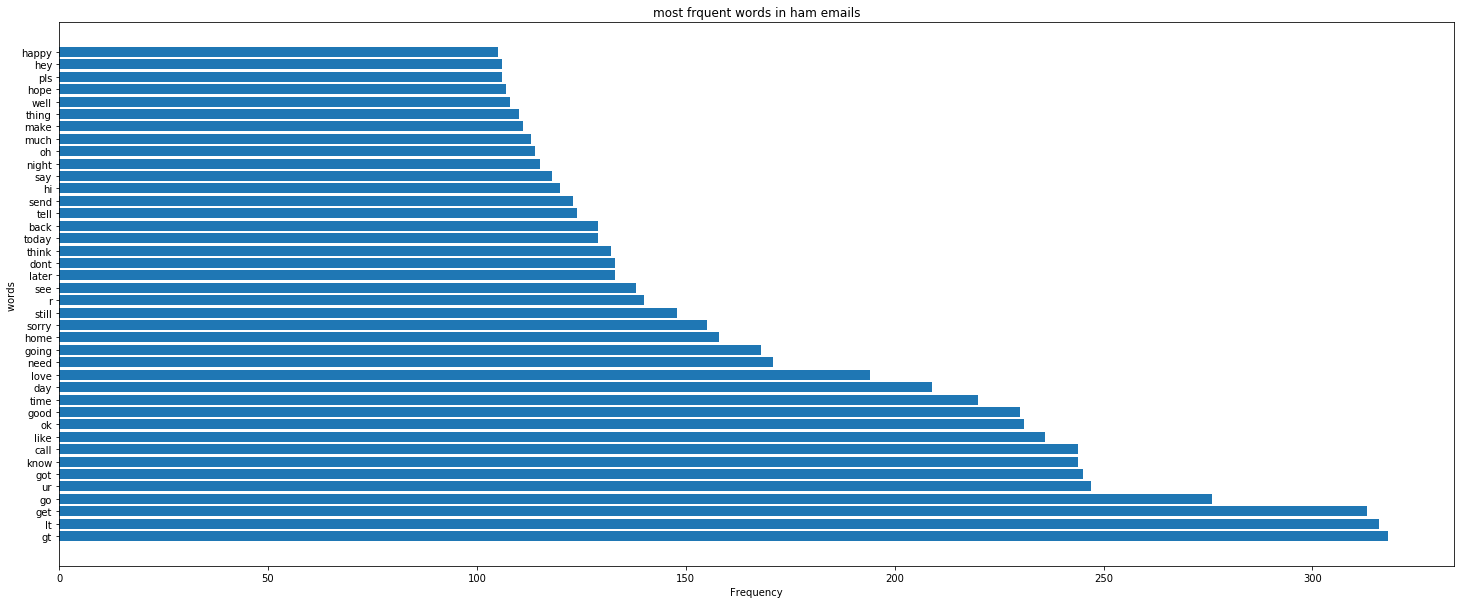

In [6]:
import collections
import matplotlib as mlp
import numpy as np
import operator as op
#import os


text_dict1={}

df_ham = df[df.class_label=='ham']
all_ham_cleaned =df[df.class_label=='ham']["Cleaned_MSGS"].tolist()
all_ham_cleaned[0]
text_ham = ["".join(text) for text in all_ham_cleaned]
final_text_ham = " ".join(text_ham)
final_text_ham[:10000000000000000000]
filtered_words_ham = [word for word in final_text_ham.split()]
for word in filtered_words_ham:
    if word in text_dict1:
        text_dict1[word]+=1
    else:
        text_dict1[word]=1
        
sort_list1=sorted(text_dict1.items(),key=op.itemgetter(1),reverse=True)    
max_words1=sort_list1[:40]
words1=list(zip(*max_words1))[0]
frquencey1=list(zip(*max_words1))[1]

y_position1=np.arange(len(words1))
plt.figure(figsize=(25,10))
plt.barh(y_position1,frquencey1,align='center')
plt.title('most frquent words in ham emails')
plt.yticks(y_position1,words1)
plt.xlabel('Frequency')
plt.ylabel('words ')

#the code below give count for top 50 words  

#counted_words_ham = collections.Counter(filtered_words_ham)
#word_count_ham = {}
#for letter, count in counted_words_ham.most_common(50):
#    word_count_ham[letter] = count
    
#for i,j in word_count_ham.items():
#        print('Word: {0}, count: {1}'.format(i,j))
        
plt.show()


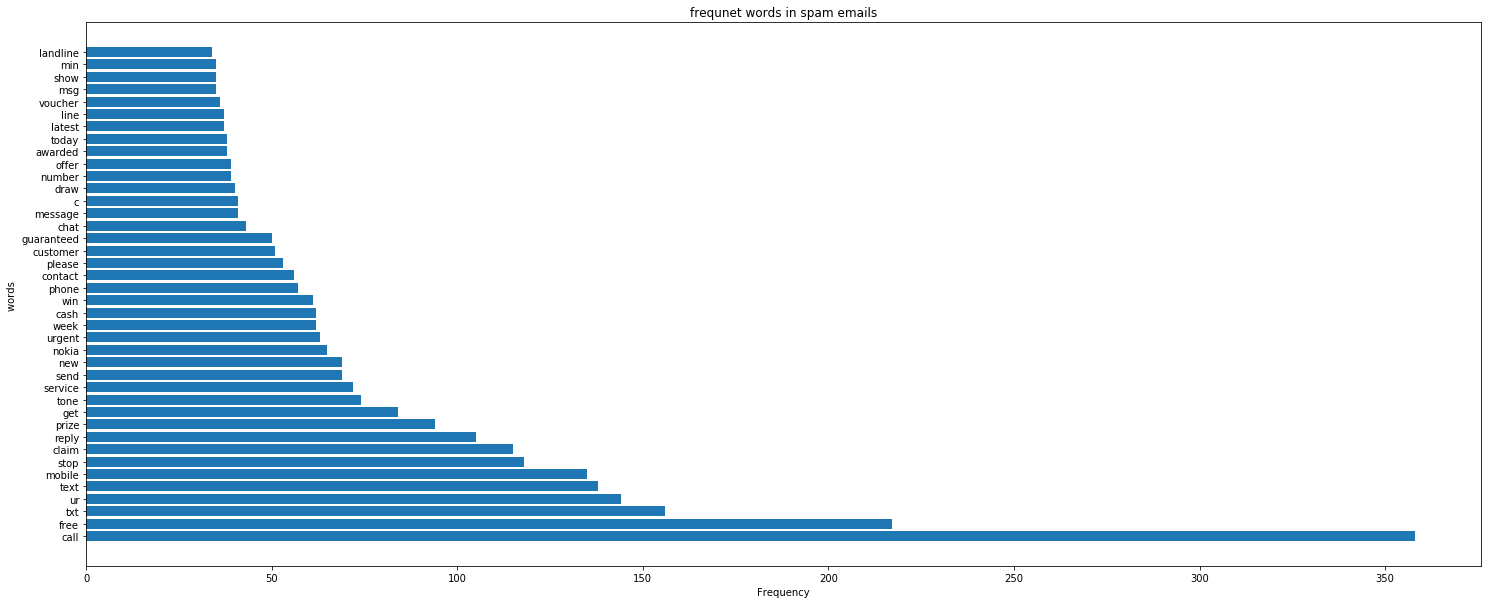

In [7]:
text_dict2={}
df_spam = df[df.class_label=='spam']
all_spam_cleaned =df[df.class_label=='spam']["Cleaned_MSGS"].tolist()
#all_spam_cleaned =df_spam["messages"].tolist()
all_spam_cleaned[0]
text_spam = ["".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:10000000000000000000]
filtered_words_spam = [word for word in final_text_spam.split()]
for word in filtered_words_spam:
    if word in text_dict2:
        text_dict2[word]+=1
    else:
        text_dict2[word]=1
        
sort_list=sorted(text_dict2.items(),key=op.itemgetter(1),reverse=True)        
max_words=sort_list[:40]
words=list(zip(*max_words))[0]
frquencey=list(zip(*max_words))[1]
y_position=np.arange(len(words))
plt.figure(figsize=(25,10))
plt.barh(y_position,frquencey,align='center')
plt.title('frequnet words in spam emails')
plt.yticks(y_position,words)
plt.xlabel('Frequency')
plt.ylabel('words ')

#counted_words_spam = collections.Counter(filtered_words_spam)
#word_count_spam = {}
#for letter, count in counted_words_spam.most_common(50):
#    word_count_spam[letter] = count
    
#for i,j in word_count_spam.items():
#        print('Word: {0}, count: {1}'.format(i,j))
        
plt.show()
        


TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer # for document matrix

tf=TfidfVectorizer(max_features=2000)#top 2000 common words AND THIER TFIDF CALCULATED
x=tf.fit_transform(MSG_LIST)#array independat feature (messages)

pd.DataFrame(x.todense(),columns=tf.get_feature_names())

,abi,abiola,able,abt,abta,ac,acc,accept,access,accident,...,yijue,ym,yoga,yogasana,yr,yummy,yun,yuo,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Count Vectorizer

In [9]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer(max_features=2000)
#x=cv.fit_transform(MSG_LIST)#.toarray()
#print(x)
#pd.DataFrame(x.todense(),columns=cv.get_feature_names())

In [10]:

y=pd.get_dummies(df["class_label"])
y=y.iloc[:,1].values #dependant feature (label) is spam or not
print(y)

[0 0 1 ... 0 0 0]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

In [12]:
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

classifier = DecisionTreeClassifier(criterion="gini", max_depth=100)
classifier=classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)


In [13]:
cf_matrix=confusion_matrix(y_test,y_pred)# where diagonals are correctly predicted values

print(classification_report(y_test, y_pred))

accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: %.3f' % accuracy)

score_2 = f1_score(y_test, y_pred, average='binary')
print('F-SCORE: %.3f' % score_2 )


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1451
           1       0.87      0.86      0.86       221

    accuracy                           0.96      1672
   macro avg       0.92      0.92      0.92      1672
weighted avg       0.96      0.96      0.96      1672

Accuracy: 0.964
F-SCORE: 0.863


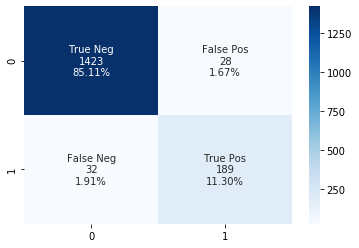

In [14]:
#for heatmap
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')